<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12, 10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

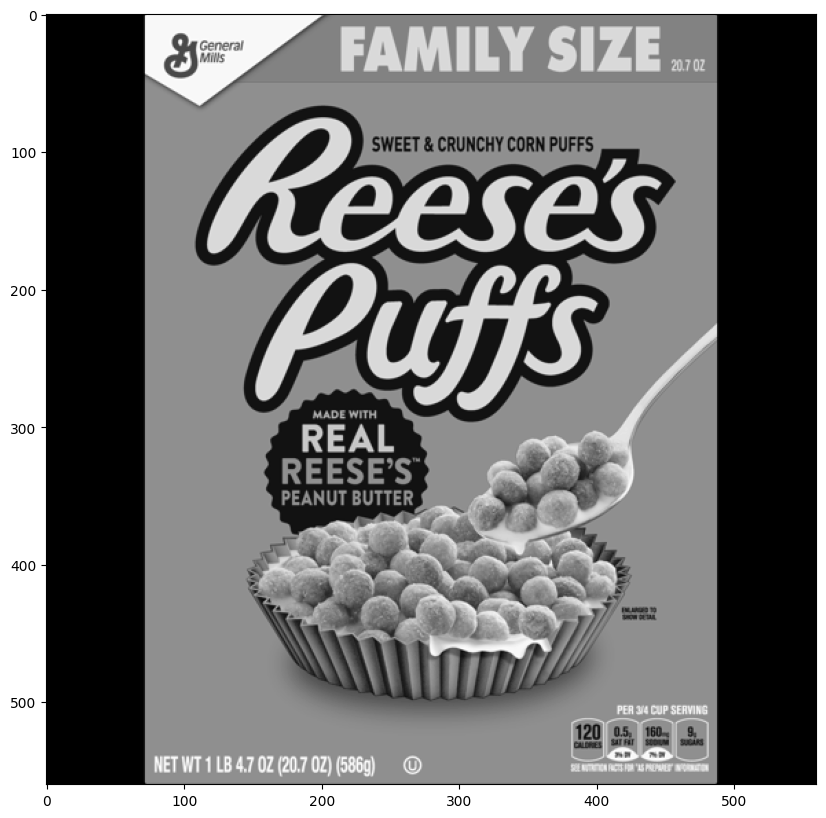

In [ ]:
reeses = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/reeses_puffs.png', 0)
display(reeses)

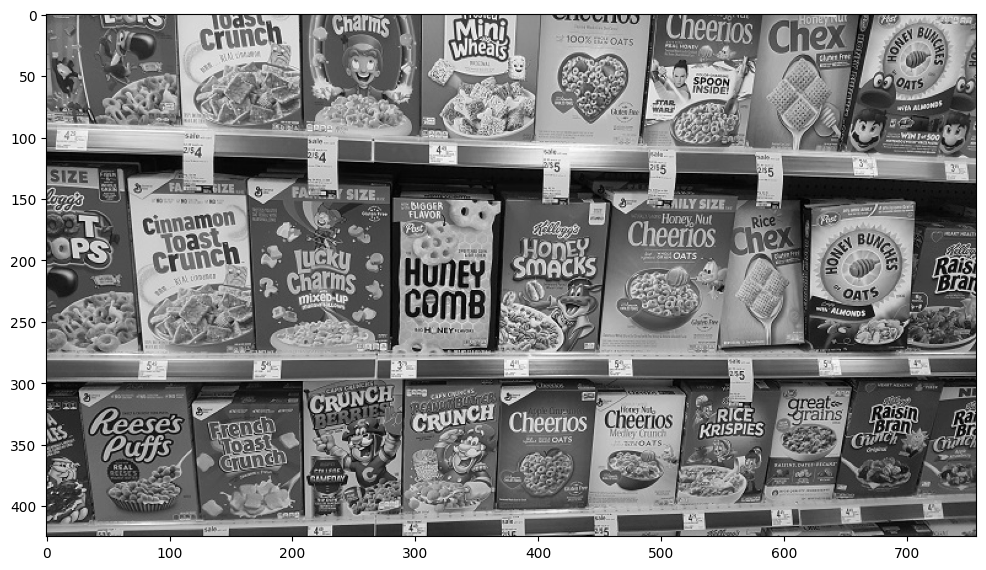

In [ ]:
cereals = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/many_cereals.jpg', 0)
display(cereals)

In [ ]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match.distance

71.0

In [ ]:
len(matches)

139

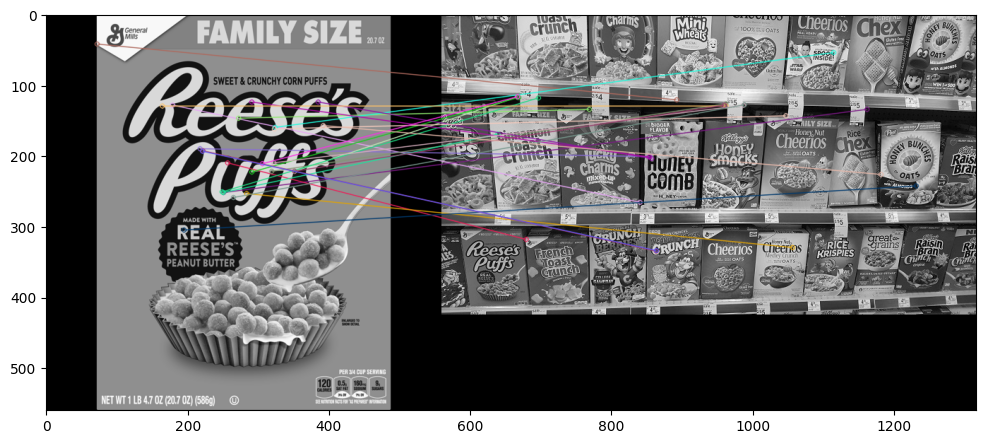

In [ ]:
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)
display(reeses_match)

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []

# Makin kecil jarak, makin cocok
# ratio match1 < 75% Match2
for match1, match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [ ]:
len(matches)

1501

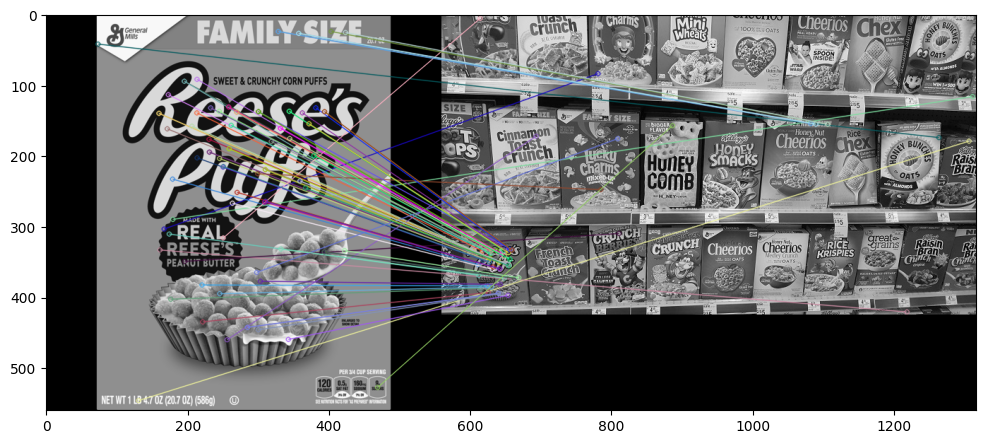

In [ ]:
sift_matches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

# **Tugas Praktikum**

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).

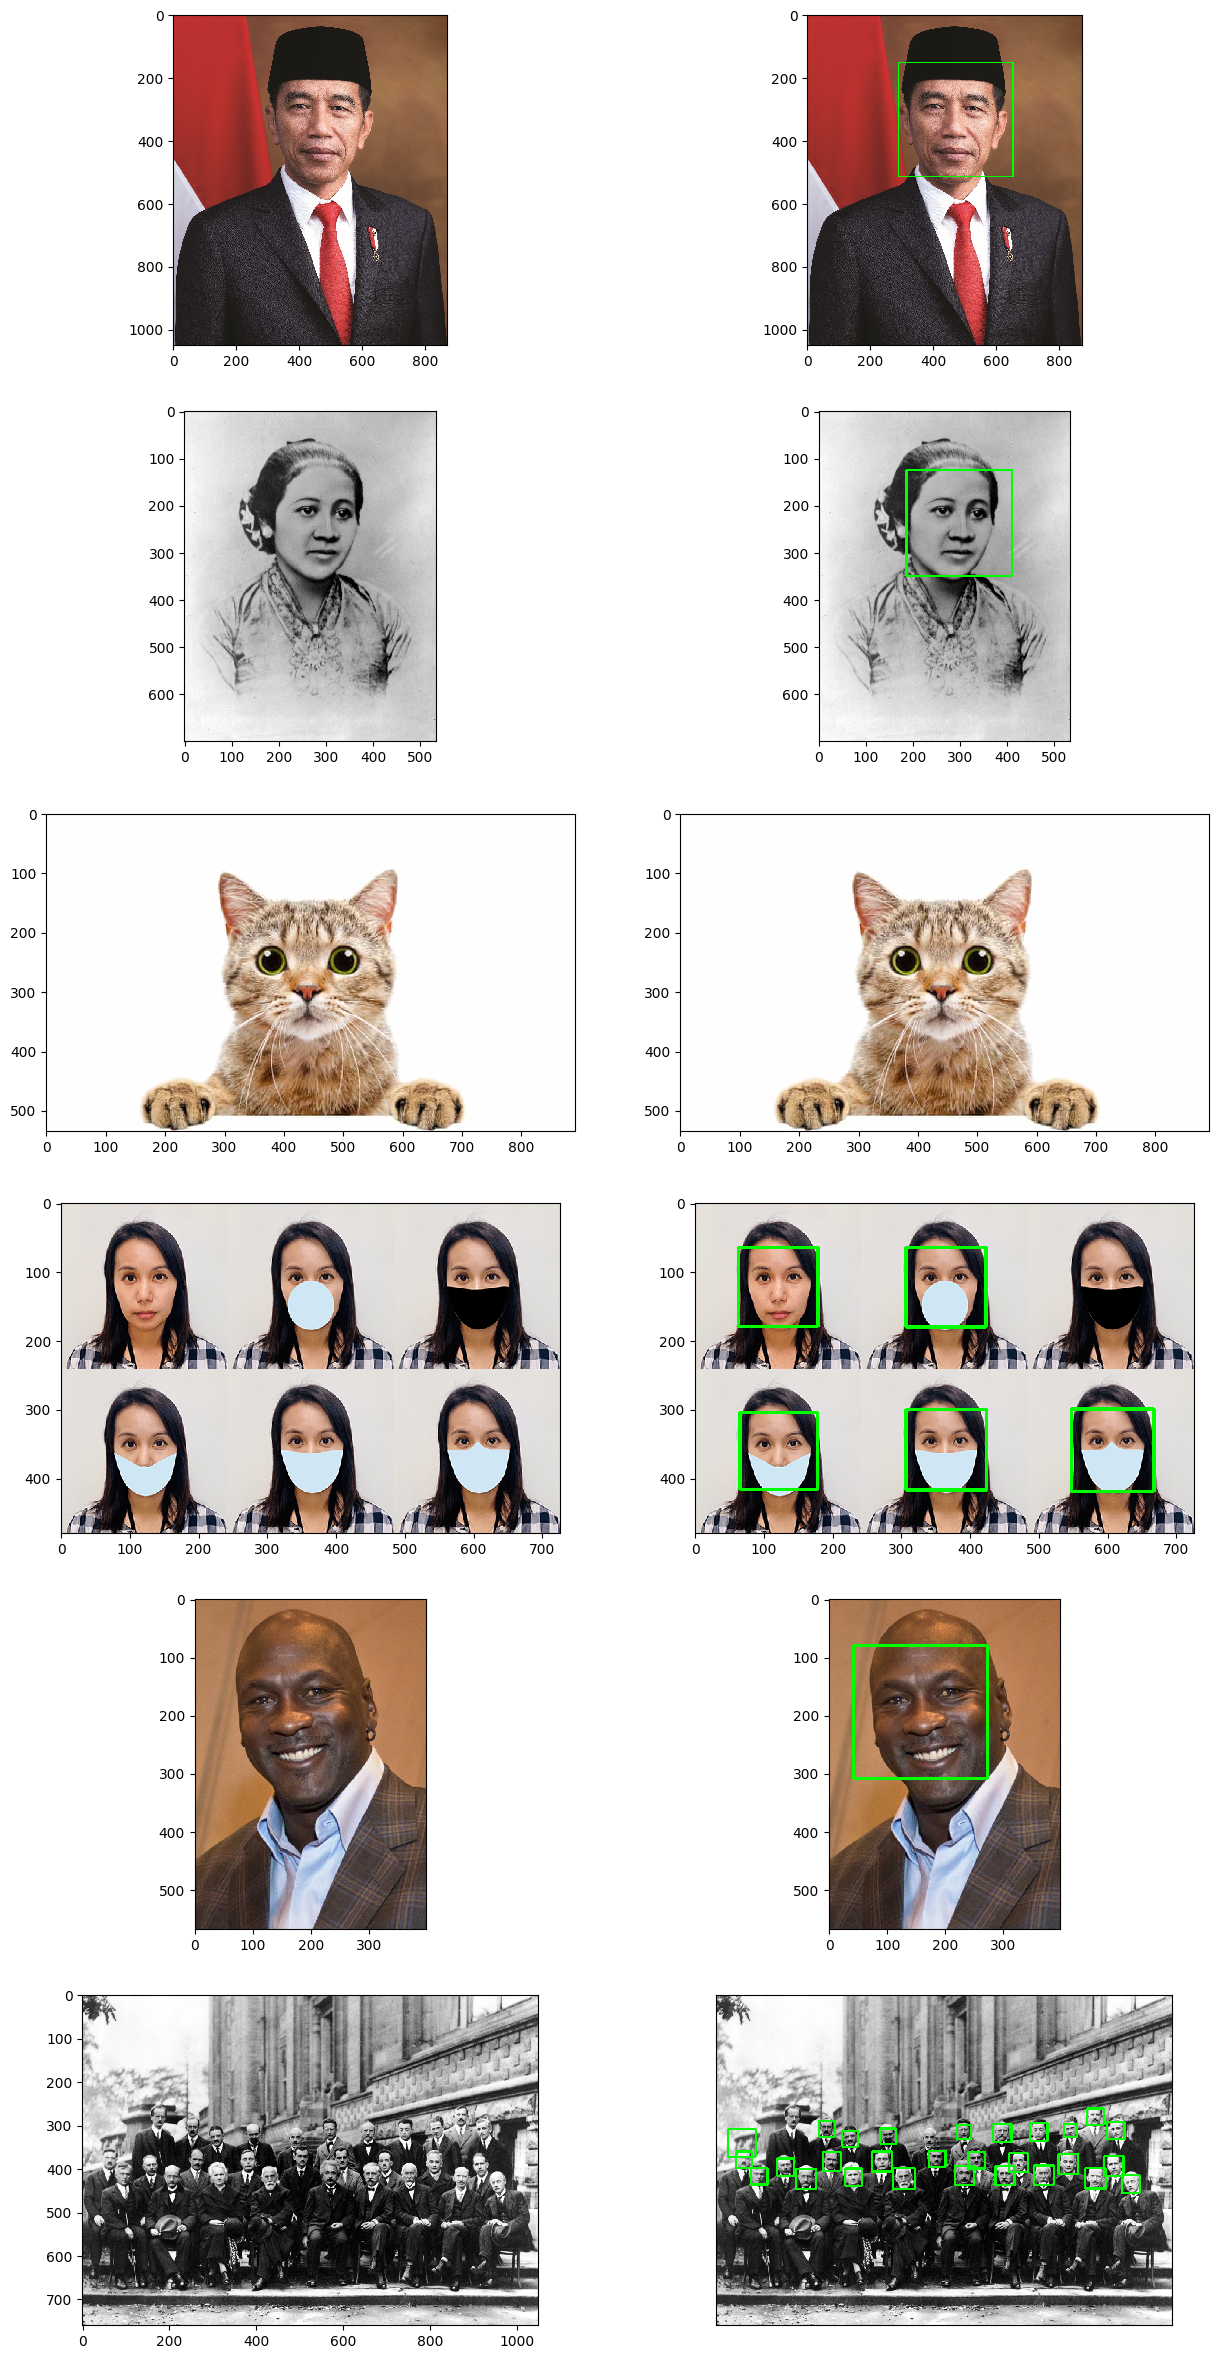

In [27]:
cescade_wajah = cv.CascadeClassifier(
    '/content/drive/MyDrive/PCVK/img/facedet/haarcascades/haarcascade_frontalface_alt.xml')

def facedet(img):
  img = img.copy()
  roi_wajah = cescade_wajah.detectMultiScale(img)
  for(x, y, w, h) in roi_wajah:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
  return img

jokowi = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/kartini.jpg')
kucing = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/kucing.jpg')
mask = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/mask.png')
mjordan = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/mjordan.jpg')
solvay = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/solvayconf.jpg')

hasil1 = facedet(jokowi)
hasil2 = facedet(kartini)
hasil3 = facedet(kucing)
hasil4 = facedet(mask)
hasil5 = facedet(mjordan)
hasil6 = facedet(solvay)

results = [jokowi, hasil1, kartini, hasil2, kucing, hasil3, mask, hasil4,
           mjordan, hasil5, solvay, hasil6]

plt.figure(figsize = (15,30))
for i in range(len(results)):
  plt.subplot(6,2,i+1),plt.imshow(cv.cvtColor(results[i], cv.COLOR_BGR2RGB),
                                  interpolation='nearest')
plt.xticks([]),plt.yticks([])
plt.show()


3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.


In [34]:
cescade_cat = cv.CascadeClassifier(
    '/content/drive/MyDrive/PCVK/img/facedethaarcascades/haarcascade_frontalcatface_extended.xml')

kucing = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/mycat.jpg', 0)
roi_wajah = cescade_cat.detectMultiScale(kucing)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(kucing, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.figure(figsize=(10, 10))
plt.imshow(kucing, cmap='gary')


error: ignored